# E-Commerce Sales Data Analysis

description here

## Import Modules and Libraries


In [69]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import data
df = pd.read_csv('ecommerce_sales_analysis.csv')
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


## Cleaning Data and Feature Engineering

In [3]:
# Check data types
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [4]:
# Check for null values
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check columns of the dataset
df.columns

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')

In [7]:
# Converted each numeric "sales_month..." column into months
num_months = ['sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12']

months = ['January_Sales', 'February_Sales', 'March_Sales', 'April_Sales', 'May_Sales', 'June_Sales', 'July_Sales', 'August_Sales', 'September_Sales', 'October_Sales', 'November_Sales', 'December_Sales']

for x,y in zip(num_months, months):
    df[y] = df[x]
    del df[x]

display(df)

,product_id,product_name,category,price,review_score,review_count,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


In [8]:
# Created an "annual sales" column by adding sales values from all 12 months
months = ['January_Sales', 'February_Sales', 'March_Sales', 'April_Sales', 'May_Sales', 'June_Sales', 'July_Sales', 'August_Sales', 'September_Sales', 'October_Sales', 'November_Sales', 'December_Sales']

year = 0

for month in months:
    value = df[month]
    year += value


df['Total_sales'] = year
df

,product_id,product_name,category,price,review_score,review_count,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales,Total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393,5515
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474,4511
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654,5527
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394,4546


## Sales Trends and Performance Analysis:

### 1. What are the top-selling products each month?

In [9]:
# Filtered through each month for the top selling products and their sales
months = ['January_Sales', 'February_Sales', 'March_Sales', 'April_Sales', 'May_Sales', 'June_Sales', 'July_Sales', 'August_Sales', 'September_Sales', 'October_Sales', 'November_Sales', 'December_Sales']

for month in months:
    prod_name = df[df[month] == df[month].max()][['product_name', month]]
    display(prod_name)

,product_name,January_Sales
271,Product_272,1000


,product_name,February_Sales
852,Product_853,1000


,product_name,March_Sales
865,Product_866,999


,product_name,April_Sales
390,Product_391,1000


,product_name,May_Sales
201,Product_202,1000


,product_name,June_Sales
802,Product_803,1000


,product_name,July_Sales
262,Product_263,1000
720,Product_721,1000


,product_name,August_Sales
911,Product_912,1000


,product_name,September_Sales
76,Product_77,1000
554,Product_555,1000
852,Product_853,1000


,product_name,October_Sales
434,Product_435,1000
673,Product_674,1000


,product_name,November_Sales
345,Product_346,1000
534,Product_535,1000


,product_name,December_Sales
726,Product_727,1000
862,Product_863,1000


**Conclusion**:
- All top-selling products are worth around 1,000 execept Product 866 (The top selling product for sales month 3)


### 2. How do sales vary seasonally or during specific months?

In [10]:
# Organized each montly sales into their respective seasons

winter = df[['December_Sales', 'January_Sales', 'February_Sales']]
spring = df[['March_Sales', 'April_Sales', 'May_Sales']]
summer = df[['June_Sales', 'July_Sales', 'August_Sales']]
fall = df[['September_Sales', 'October_Sales', 'November_Sales']]

seasons = [winter, spring, summer, fall]

In [11]:
# Calculated the average amount of units sold for each month
months = ['January_Sales', 'February_Sales', 'March_Sales', 'April_Sales', 'May_Sales', 'June_Sales', 'July_Sales', 'August_Sales', 'September_Sales', 'October_Sales', 'November_Sales', 'December_Sales']
avg_month_sales = []


for month in months:
    value = df[month].mean().round(2)
    avg_month_sales.append(value)

month_sales = pd.DataFrame({
    'Months': months,
    'Average Monthly Sales': avg_month_sales
})

month_sales

,Months,Average Monthly Sales
0,January_Sales,498.31
1,February_Sales,507.66
2,March_Sales,506.74
3,April_Sales,503.82
4,May_Sales,487.19
5,June_Sales,491.65
6,July_Sales,507.01
7,August_Sales,504.57
8,September_Sales,491.93
9,October_Sales,514.80


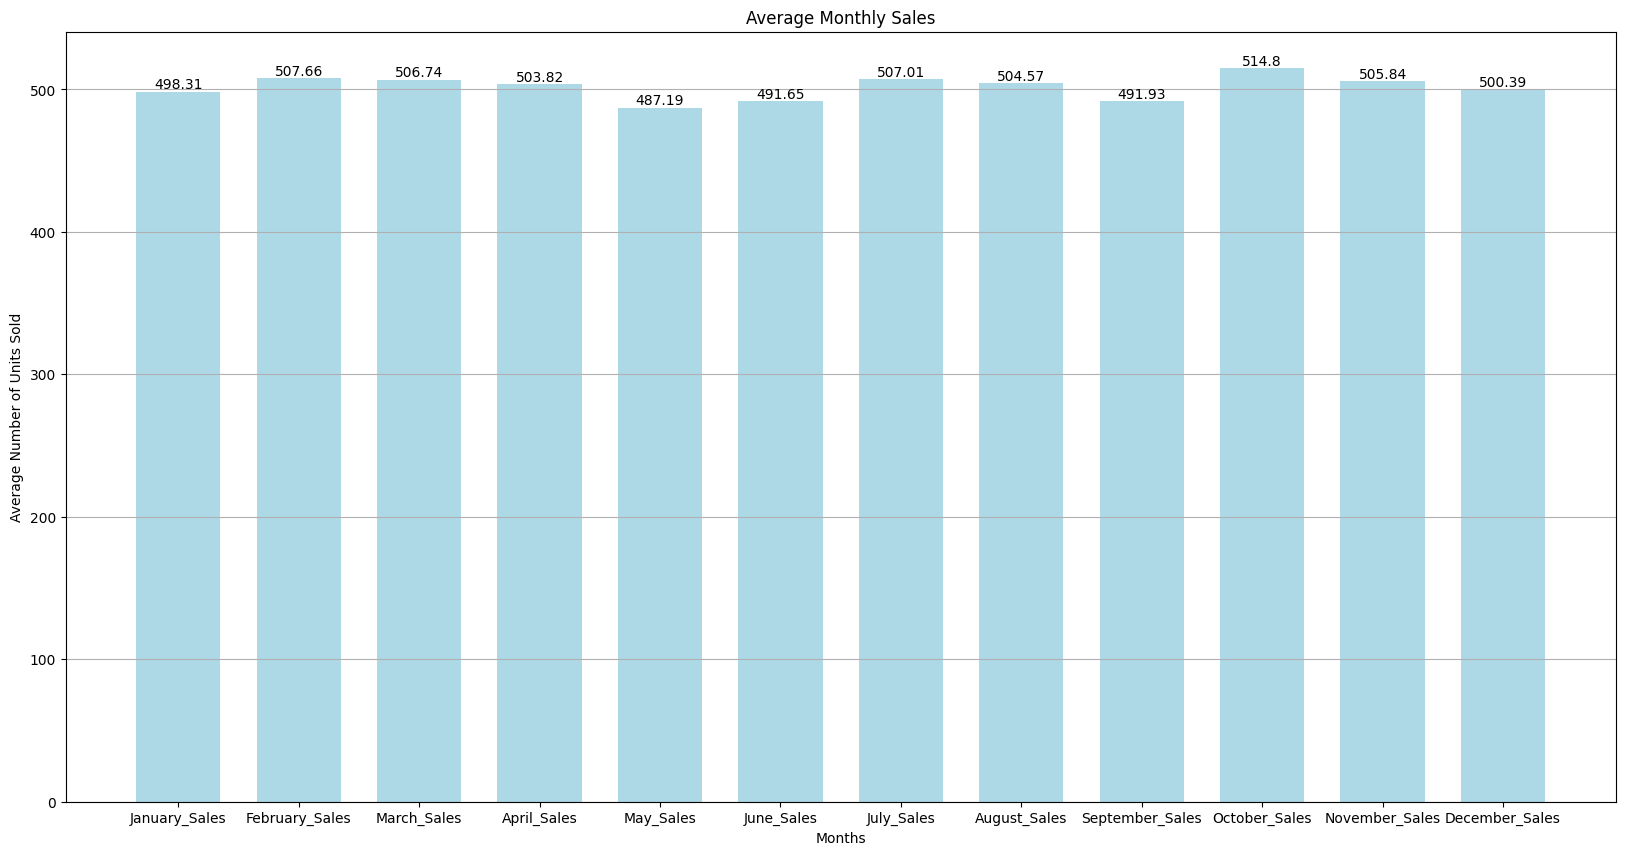

In [12]:
# Ploted a barplot displaying the average number of units sold for each month
plt.figure(figsize=(20,10))
barplot = plt.bar(
    'Months',
    'Average Monthly Sales',
    data = month_sales,
    color = 'lightblue',
    width = 0.7
)

plt.title('Average Monthly Sales')
plt.ylabel('Average Number of Units Sold')
plt.xlabel('Months')
plt.grid(axis = 'y')
plt.bar_label(barplot, label_type = 'edge')
plt.show()

In [13]:
# Calculated the average amount of units sold for each season
seasons_names = ['Winter', 'Spring', 'Summer', 'Fall']
avg_season_sales =[]

def avg_sales_per_season(seasons):
    
    value = 0
    
    for season in seasons:
        value += df[season]
    
    avg_sales = value.mean().round(2)
    avg_season_sales.append(avg_sales)

for season in seasons:
    avg_sales_per_season(season)

season_sales = pd.DataFrame({
    'Seasons': seasons_names,
    'Average Sales Per Season': avg_season_sales
})

season_sales

,Seasons,Average Sales Per Season
0,Winter,1506.35
1,Spring,1497.76
2,Summer,1503.23
3,Fall,1512.57


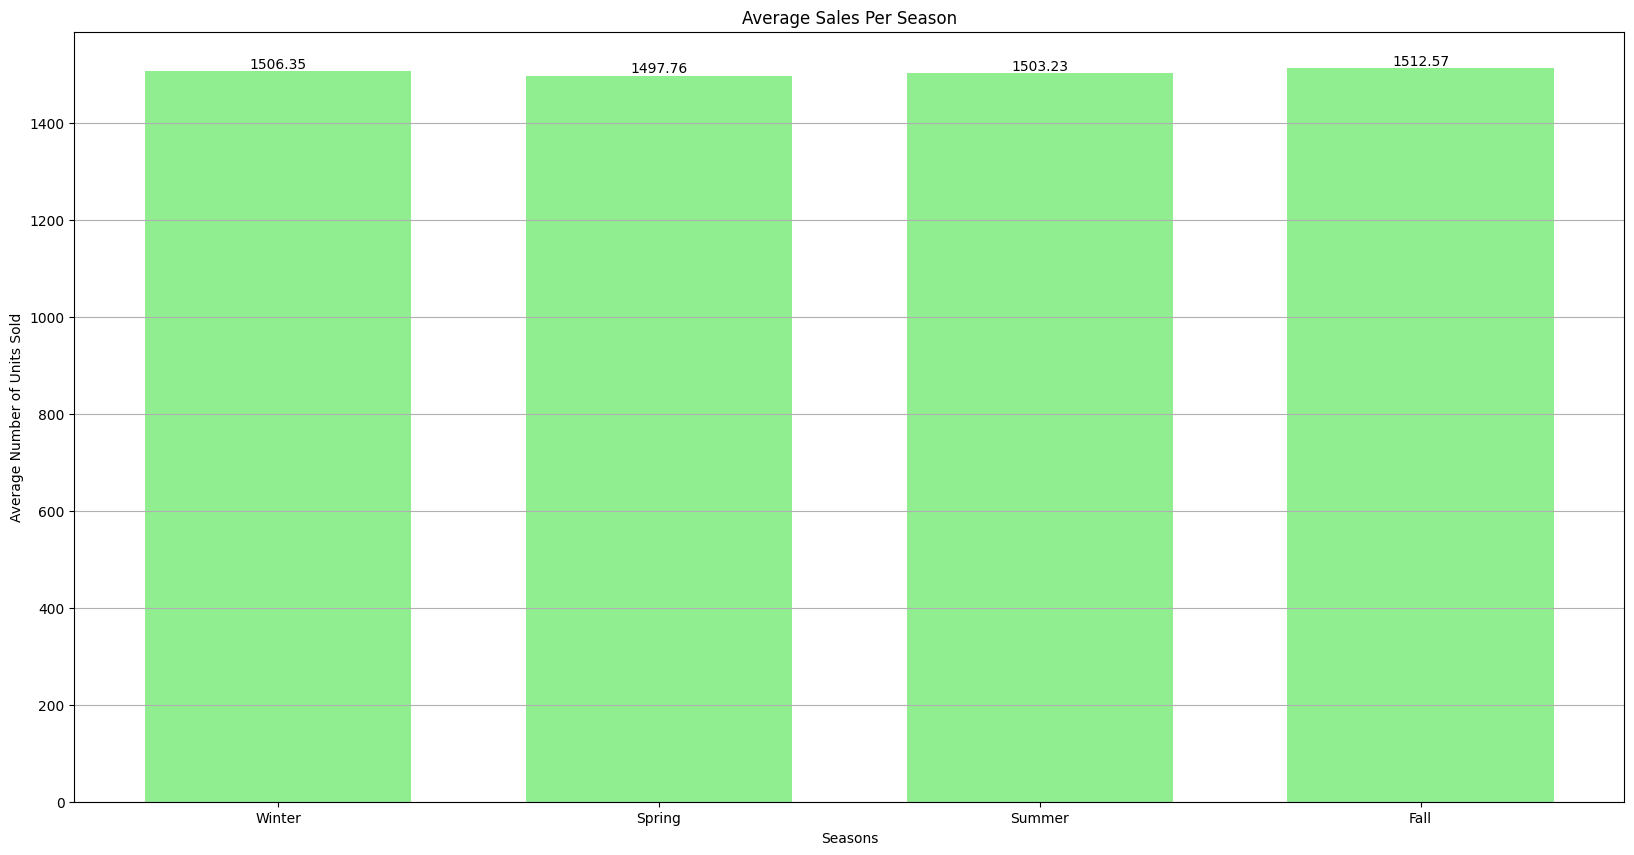

In [14]:
# Ploted a barplot displaying the average number of units sold for each season
plt.figure(figsize=(20,10))
barplot = plt.bar(
    'Seasons',
    'Average Sales Per Season',
    data = season_sales,
    color = 'lightgreen',
    width = 0.7
)

plt.title('Average Sales Per Season')
plt.ylabel('Average Number of Units Sold')
plt.xlabel('Seasons')
plt.grid(axis = 'y')
plt.bar_label(barplot, label_type='edge')
plt.show()

**Conclusion**:
- There is little to no variance in number of units sold seasonally or monthly

## Pricing Analysis:

### 1. Is there a correlation between product price and sales volume?

<Axes: >

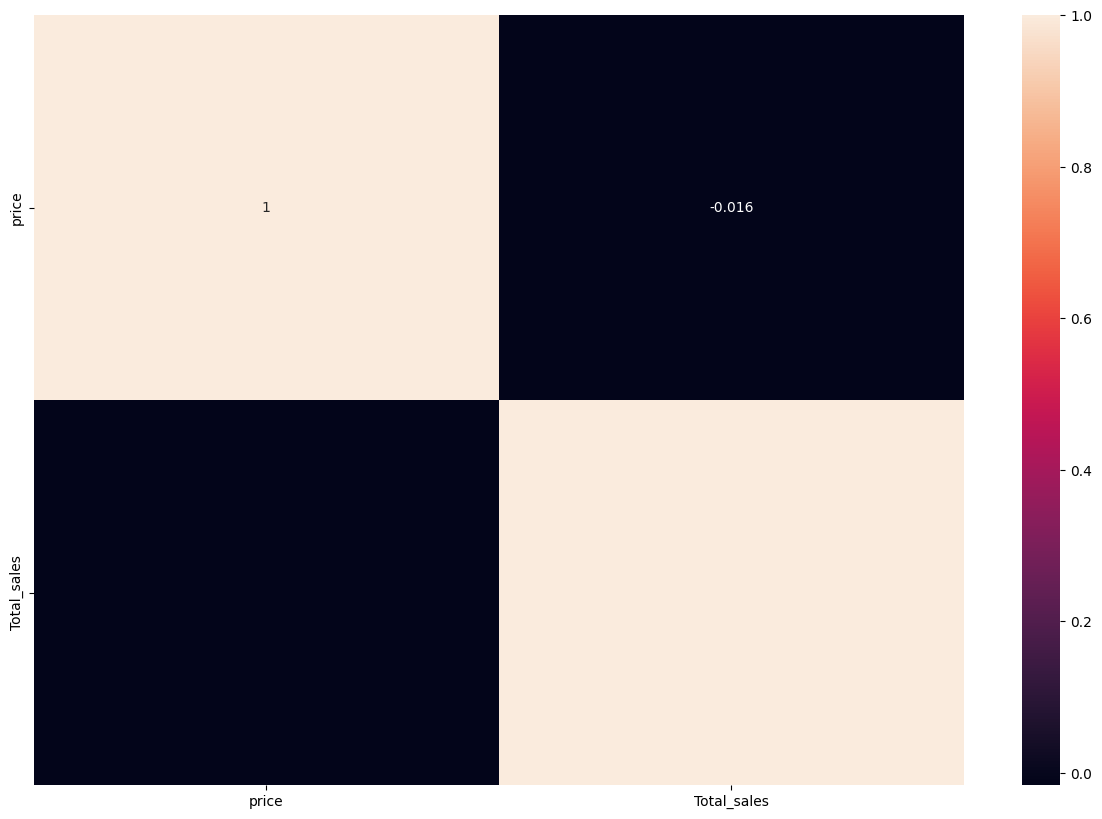

In [15]:
# Created and ploted a correlation matrix heatmap to determine the level of correlation between product price and sales volume 
corr_df = df[['price', 'Total_sales']]
corr_matrix = corr_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

**Conclusion**:
- Based of the correlation matrix, there is little to no significant linear relationship between product price and sales volume

### 2. How does price impact the review scores and review counts?


In [16]:
# Found the average, min, and max values of the price, review_score, and review_count columns in the dataset
df[['price','review_score', 'review_count']].describe()

,price,review_score,review_count
count,1000.000000,1000.000000,1000.000000
mean,247.677130,3.027600,526.506000
std,144.607983,1.171243,282.269932
min,7.290000,1.000000,1.000000
25%,121.810000,2.000000,283.750000
50%,250.920000,3.100000,543.000000
75%,373.435000,4.000000,772.000000
max,499.860000,5.000000,999.000000


<Axes: >

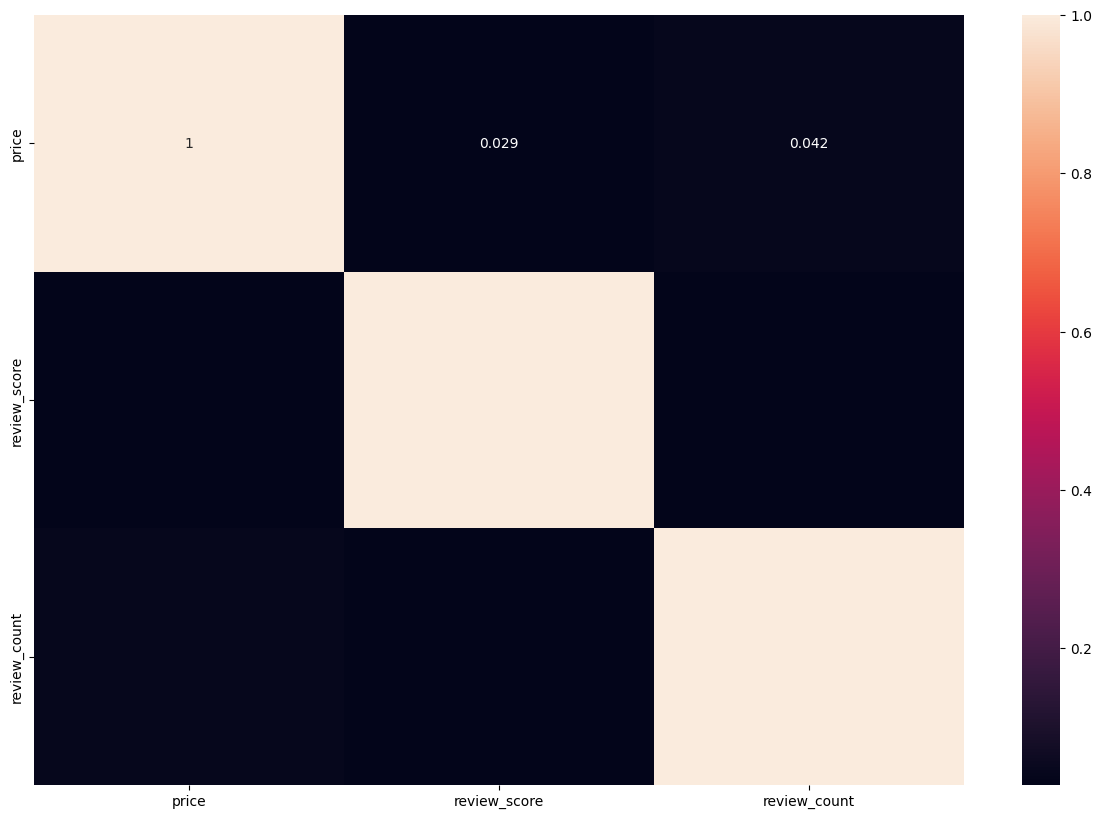

In [17]:
# Created a correlation matrix for price, review_score, and review_count columns
corr_df = df[['price', 'review_score', 'review_count']]
corr_matrix = corr_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

**Conclusion**:
- Based on the correlation matrix, both review scores and number of reviews have little to no signigicant linear realtionship with the price of a product

## Customer Feedback and Product Quality:

### 1. Which products have the highest and lowest review scores?

In [18]:
# Found all products with a maximum review score of 5/5
max_review_score = df[df['review_score'] == df['review_score'].max()][['product_name', 'review_score']]
max_review_score

,product_name,review_score
11,Product_12,5.0
54,Product_55,5.0
74,Product_75,5.0
88,Product_89,5.0
104,Product_105,5.0
209,Product_210,5.0
333,Product_334,5.0
348,Product_349,5.0
464,Product_465,5.0
584,Product_585,5.0


In [19]:
max_review_score.count()

product_name    19
review_score    19
dtype: int64

In [20]:
# Found all products with a minimum review score of 1/5
min_review_score = df[df['review_score'] == df['review_score'].min()][['product_name', 'review_score']]
min_review_score

,product_name,review_score
168,Product_169,1.0
264,Product_265,1.0
283,Product_284,1.0
426,Product_427,1.0
483,Product_484,1.0
515,Product_516,1.0
743,Product_744,1.0
752,Product_753,1.0
799,Product_800,1.0
886,Product_887,1.0


In [21]:
min_review_score.count()

product_name    12
review_score    12
dtype: int64

**Conclusion**:
- There are 19 products with a maximum review score of 5/5 
- There are 12 products with a minimum review score of 1/5

### 2. Is there a relationship between the number of reviews and the review score?

<Axes: >

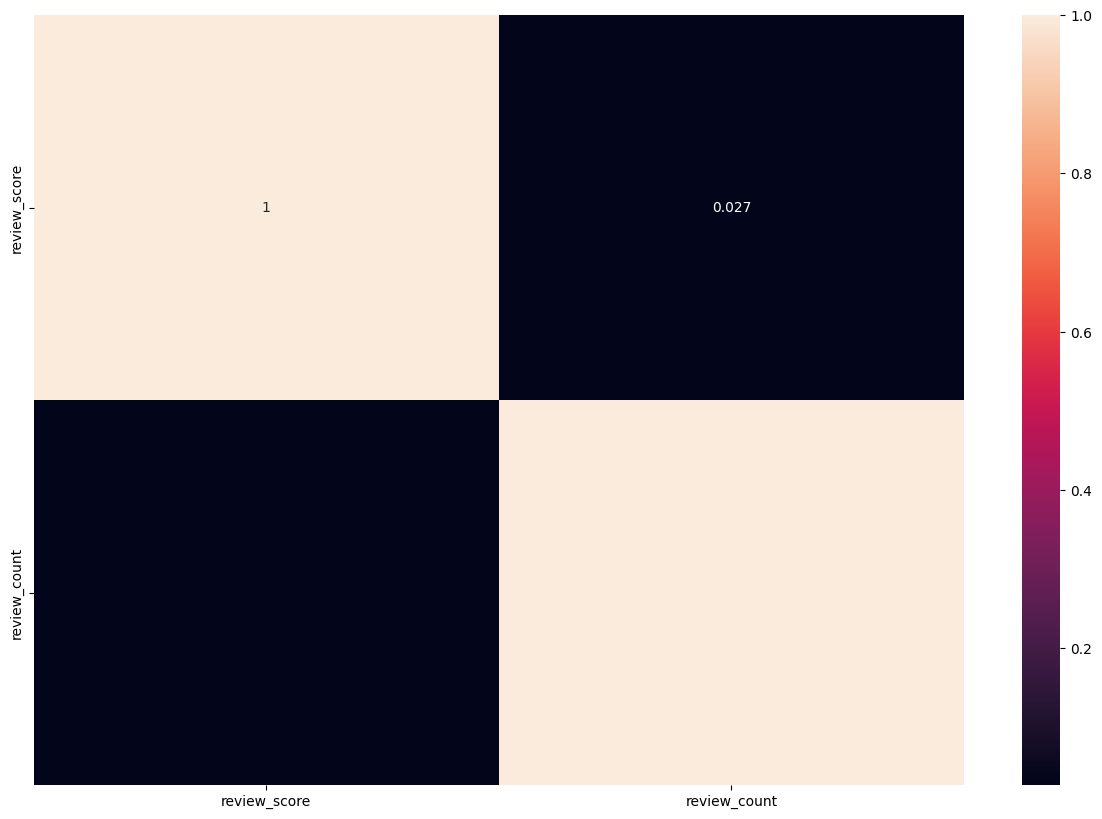

In [22]:
# Created a correlation matrix to identify the relationship between number of reviews and review score
corr_df = df[['review_score', 'review_count']]
corr_matrix = corr_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

**Conclusion**:
- According to the correlation matrix, there is little to no significant relationship between the number of reviews and the review score

### 3. How do review scores impact sales?


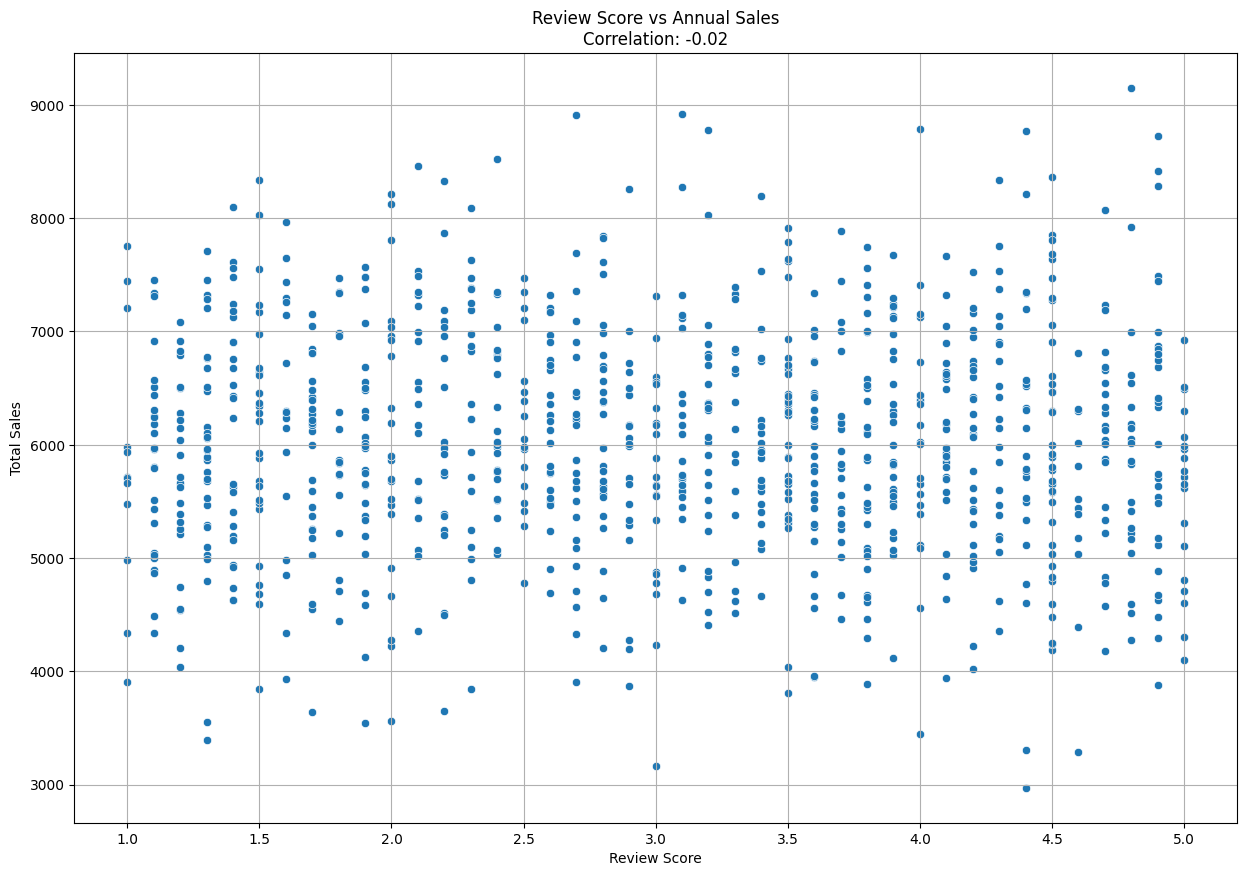

Correlation between review score and total sales: -0.018186217589286485


In [23]:
# Calculated the correlation between review scores and total sales volume
# Created a correlation matrix and plotted a scatterplot

corr_matrix = df['review_score'].corr(df['Total_sales'])


plt.figure(figsize=(15, 10))
sns.scatterplot(x='review_score', y='Total_sales', data=df)
plt.title(f'Review Score vs Annual Sales\nCorrelation: {corr_matrix:.2f}')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

print('Correlation between review score and total sales:', corr_matrix)


**Conclusion**:
- There is little to no significant correlation between review scores and sales
- A product's review score has little to no impact on sales

## Category Performance:

### 1. Which product categories have the highest and lowest sales over the past year?

In [24]:
# Found all unique categories 
df['category'].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [25]:
# Found the total sales for each product category over the past year 
categories = df['category'].unique()

prod_cat =[]
prod_sales =[]

for category in categories:
    total_sales = df[df['category'] == category]['Total_sales'].sum()
    prod_cat.append(category)
    prod_sales.append(total_sales)
    
Total_sales_prod_cat_df = pd.DataFrame({
    'Category': prod_cat,
    'Total Sales': prod_sales
})

Total_sales_prod_cat_df


,Category,Total Sales
0,Clothing,826536
1,Home & Kitchen,742141
2,Toys,917101
3,Books,938229
4,Electronics,845120
5,Health,834414
6,Sports,916371


In [26]:
# Found the product categories with the highest and lowest sales over the past year
print(Total_sales_prod_cat_df.max())
print(Total_sales_prod_cat_df.min())

Category         Toys
Total Sales    938229
dtype: object
Category        Books
Total Sales    742141
dtype: object


**Conclusion:**
- Products that are categorized as toys had the highest number of sales in the past year at $938,229
- Books had the lowest sales over the past year at $742,141

### 2. Are there specific categories that perform better during certain months?

In [27]:
# Created a subset of the data containing all relevant columns needed
cat_sales_months = df[['category', 'January_Sales', 'February_Sales', 'March_Sales', 'April_Sales', 'May_Sales', 'June_Sales', 'July_Sales', 'August_Sales', 'September_Sales', 'October_Sales', 'November_Sales', 'December_Sales']]
cat_sales_months

,category,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales
0,Clothing,479,449,92,784,604,904,446,603,807,252,695,306
1,Home & Kitchen,21,989,861,863,524,128,610,436,176,294,772,353
2,Toys,348,558,567,143,771,409,290,828,340,667,267,392
3,Toys,725,678,59,15,937,421,670,933,56,157,168,203
4,Books,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Home & Kitchen,488,359,137,787,678,970,282,155,57,575,634,393
996,Home & Kitchen,18,906,129,78,19,110,403,683,104,858,729,474
997,Sports,725,109,193,657,215,337,664,476,265,344,888,654
998,Sports,196,191,315,622,854,122,65,938,521,268,60,394


In [28]:
# Found the average monthly sales and grouped the dataset by category
avg_category_sales = cat_sales_months.groupby('category')[['January_Sales', 'February_Sales', 'March_Sales', 'April_Sales', 'May_Sales', 'June_Sales', 'July_Sales', 'August_Sales', 'September_Sales', 'October_Sales', 'November_Sales', 'December_Sales']].mean().round(2)
avg_category_sales

,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales
category,,,,,,,,,,,,
Books,506.05,519.99,499.99,485.06,513.32,497.69,513.73,507.19,501.37,542.23,497.12,508.65
Clothing,435.47,485.08,548.54,500.63,440.31,450.88,472.18,531.59,519.11,491.47,512.02,516.56
Electronics,553.24,525.16,512.38,530.13,522.96,507.68,523.36,476.48,506.62,508.32,493.83,463.91
Health,486.65,485.12,486.35,524.64,497.68,459.90,541.41,497.31,464.61,522.40,521.58,515.33
Home & Kitchen,462.75,458.02,501.34,523.10,478.13,505.35,481.03,520.34,465.08,519.01,530.25,492.74
Sports,508.08,537.54,490.91,485.54,480.18,494.39,503.80,483.08,517.71,524.10,485.42,478.60
Toys,528.72,531.60,509.00,485.28,476.29,523.77,510.61,517.91,464.96,494.46,505.95,524.95


In [29]:
# Created a data frame containing the best performing categories of each month along with its highest average sales value

m = []
best_performing_category = []
highest_average_sales = []



for month in months:
    max_index = avg_category_sales[month].idxmax()
    max_value = avg_category_sales[month].max()
    
    m.append(month)
    best_performing_category.append(max_index)
    highest_average_sales.append(max_value)
    
   
cat_monthly_performance = pd.DataFrame({
    "Month":m,
    "Best Performing Category":best_performing_category,
    "Highest Average Sales":highest_average_sales
})

cat_monthly_performance

,Month,Best Performing Category,Highest Average Sales
0,January_Sales,Electronics,553.24
1,February_Sales,Sports,537.54
2,March_Sales,Clothing,548.54
3,April_Sales,Electronics,530.13
4,May_Sales,Electronics,522.96
5,June_Sales,Toys,523.77
6,July_Sales,Health,541.41
7,August_Sales,Clothing,531.59
8,September_Sales,Clothing,519.11
9,October_Sales,Books,542.23


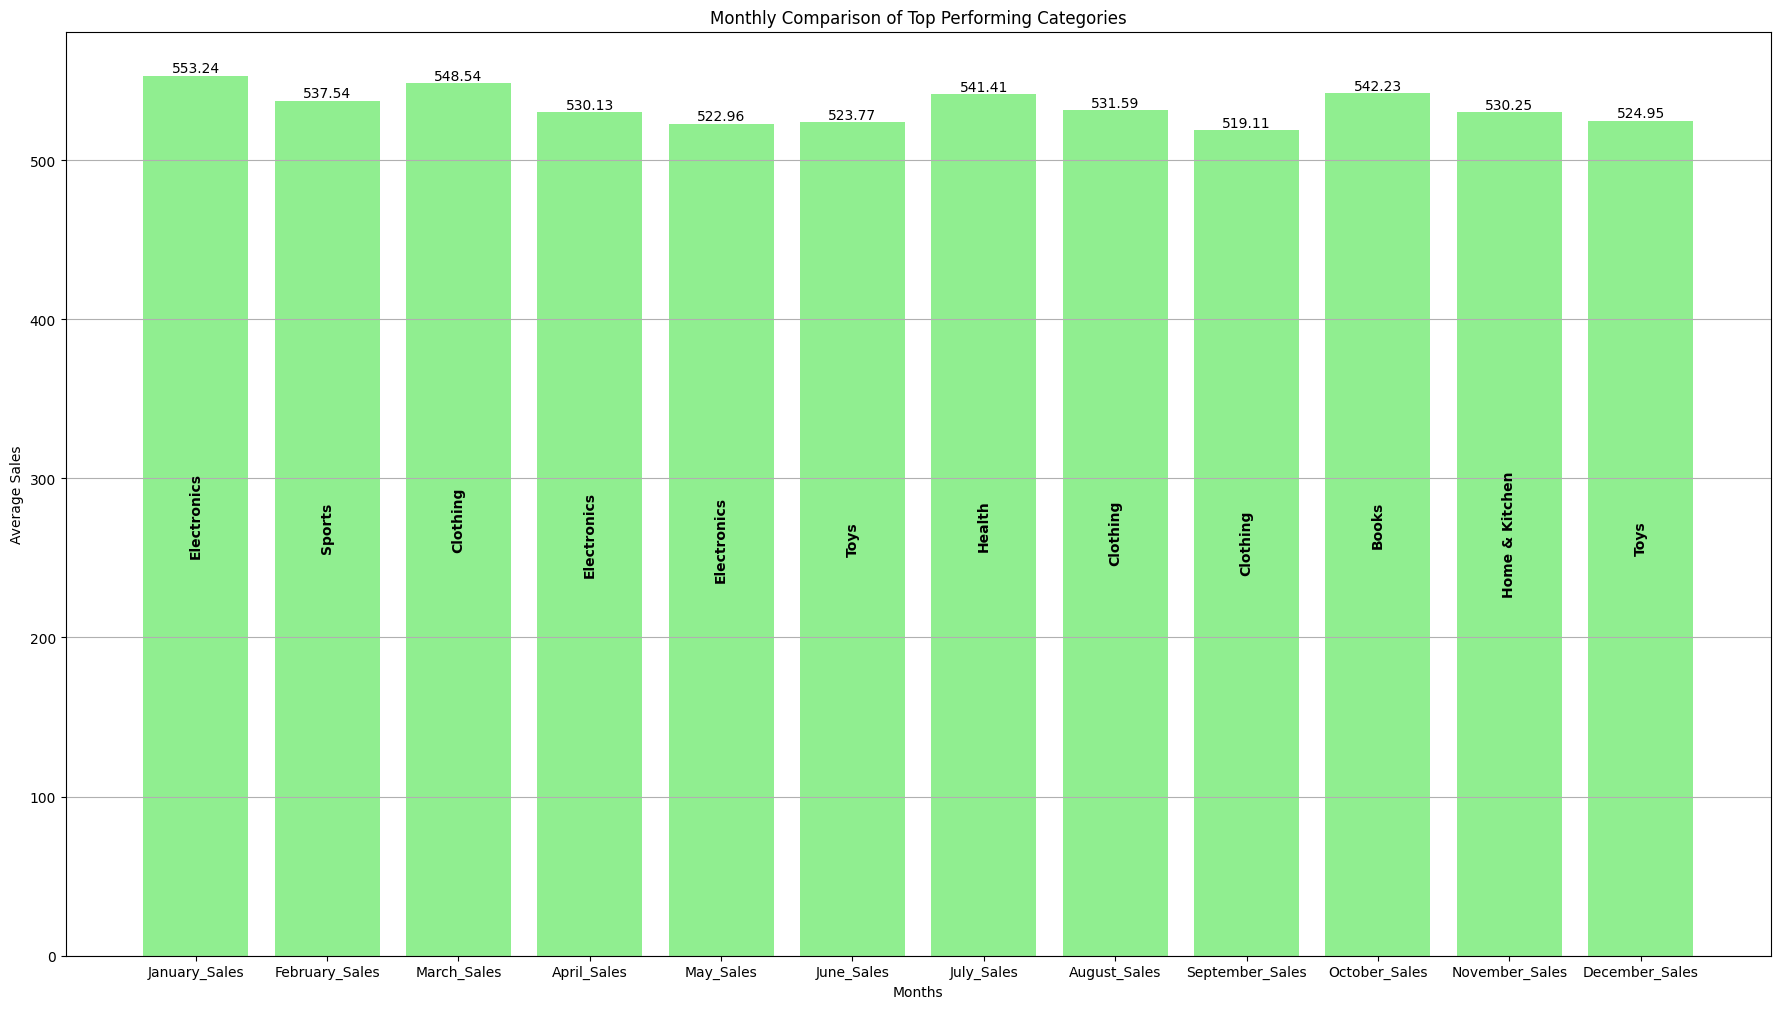

In [30]:
# Plotted a bar graph comparing top performers of each month

plt.figure(figsize=(22,12))

barplot = plt.bar(
    "Month",
    "Highest Average Sales",
    data = cat_monthly_performance,
    color = "lightgreen"
)

plt.title("Monthly Comparison of Top Performing Categories")
plt.ylabel("Average Sales")
plt.xlabel("Months")
plt.grid(axis = "y")
plt.bar_label(barplot, label_type='edge')
plt.bar_label(barplot, labels = best_performing_category, label_type="center", rotation = 90, fontweight = "bold")
plt.show()



In [31]:
# Sorted the data frame by highest monthly performance to lowest
cat_monthly_performance.sort_values(by = "Highest Average Sales" ,ascending=False)

,Month,Best Performing Category,Highest Average Sales
0,January_Sales,Electronics,553.24
2,March_Sales,Clothing,548.54
9,October_Sales,Books,542.23
6,July_Sales,Health,541.41
1,February_Sales,Sports,537.54
7,August_Sales,Clothing,531.59
10,November_Sales,Home & Kitchen,530.25
3,April_Sales,Electronics,530.13
11,December_Sales,Toys,524.95
5,June_Sales,Toys,523.77


In [32]:
# Found the difference in the best performing month and the worst performing month
best_month = cat_monthly_performance[cat_monthly_performance['Highest Average Sales'] == cat_monthly_performance['Highest Average Sales'].max()]
worst_month = cat_monthly_performance[cat_monthly_performance['Highest Average Sales'] == cat_monthly_performance['Highest Average Sales'].min()]
diff = best_month['Highest Average Sales'].values[0] - worst_month['Highest Average Sales'].values[0]
diff.round()

34.0

In [33]:
# Found the frequency of each category being the top performer per month
cat_monthly_performance.groupby("Best Performing Category")["Month"].count().sort_values(ascending=False)

Best Performing Category
Clothing          3
Electronics       3
Toys              2
Books             1
Health            1
Home & Kitchen    1
Sports            1
Name: Month, dtype: int64

**Conclusion**:
- Overall, clothing and electronics categories are the most frequent top performers
- Electronics tend to be a top performer in Winter and Spring seasons
- Clothes tend to be a top performer in Summer and Autumn seasons
- Certain holidays may impact top performers of each month. For example, the Toy category being a top performer in December because of Christmas or the Home & Kitchen category being a top performer in November because of Thanksgiving
- The overall difference in performance of the best and worst month is an average of 34

## Product Lifecycle (!):

### 1. How do sales for new products compare to older products over time?

In [34]:
df

,product_id,product_name,category,price,review_score,review_count,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales,Total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393,5515
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474,4511
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654,5527
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394,4546


### 2. What is the sales lifecycle for products from launch to decline?


## Revenue and Profit Analysis:

### 1. What are the total sales and revenue generated by each product and category?

In [42]:
# Found the number of products under each category
df.groupby("category")['product_name'].count()

category
Books             154
Clothing          140
Electronics       138
Health            139
Home & Kitchen    125
Sports            153
Toys              151
Name: product_name, dtype: int64

In [83]:
# Calculated the total sales generated by each category 

tsales_generated_cat = []
tsales_generated_value = []

for category in categories:
    searched = df[df["category"] == category][["Total_sales"]].sum()
    searched = int(searched)


    tsales_generated_cat.append(category)
    tsales_generated_value.append(searched)

tsales_generated_df = pd.DataFrame({
    "Category": tsales_generated_cat,
    "Total Sales Generated": tsales_generated_value
})

tsales_generated_df

    

,Category,Total Sales Generated
0,Clothing,826536
1,Home & Kitchen,742141
2,Toys,917101
3,Books,938229
4,Electronics,845120
5,Health,834414
6,Sports,916371


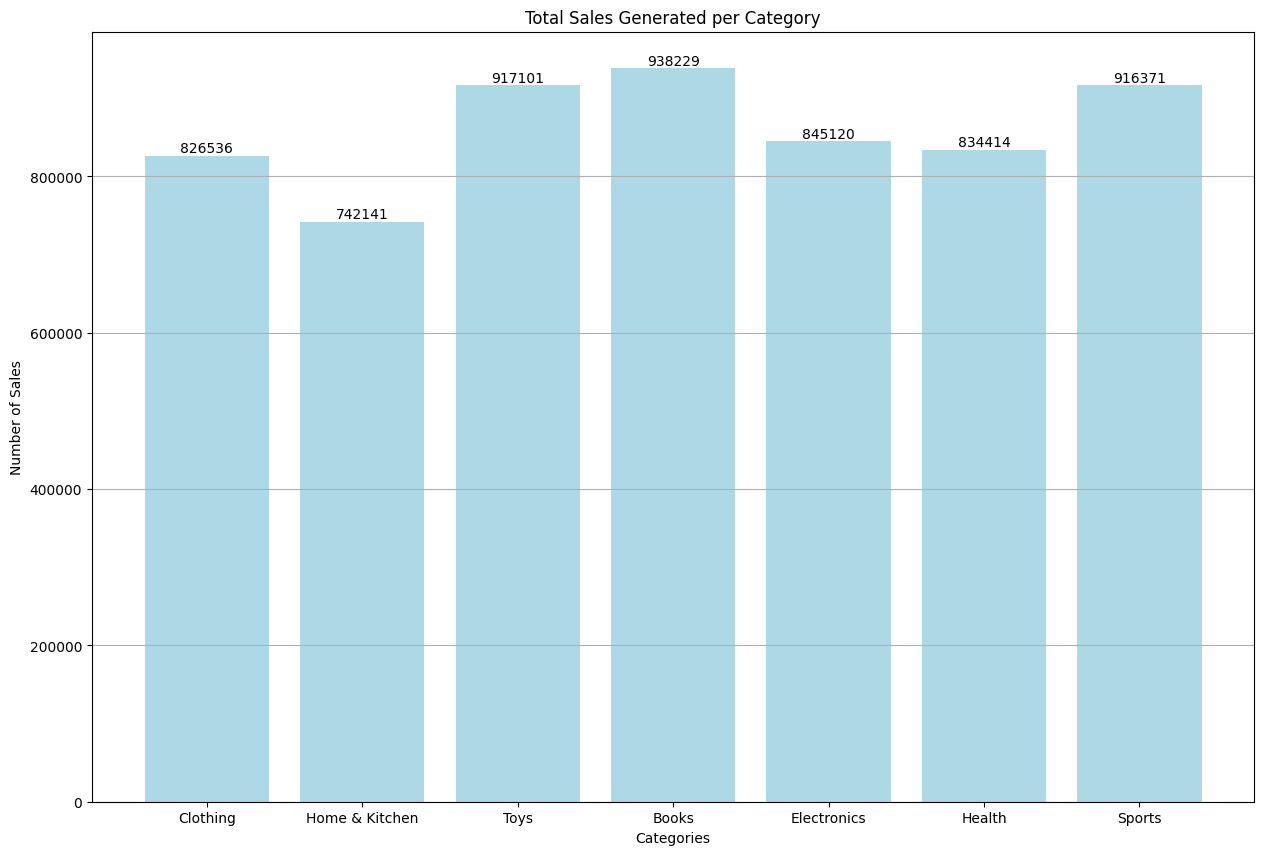

In [85]:
# Plotted the total amount of sales generated per category

plt.figure(figsize=(15,10))

barplot = plt.bar(
    "Category",
    "Total Sales Generated",
    data = tsales_generated_df,
    color = "lightblue"
)

plt.title("Total Sales Generated per Category")
plt.ylabel("Number of Sales")
plt.xlabel("Categories")
plt.grid(axis="y")
plt.bar_label(barplot, label_type="edge")
plt.show()

In [47]:
# Found the number of unique products within the dataset
len(df['product_name'].unique())

1000

In [46]:
# Beacuse the size of the dataset is 1000 by 19, and the number of unique products within the dataset is 1000, all products within the dataset are unique
df.shape

(1000, 19)

In [95]:
df

,product_id,product_name,category,price,review_score,review_count,January_Sales,February_Sales,March_Sales,April_Sales,May_Sales,June_Sales,July_Sales,August_Sales,September_Sales,October_Sales,November_Sales,December_Sales,Total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393,5515
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474,4511
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654,5527
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394,4546


In [89]:
prod_sales_df = df[["product_name", "Total_sales"]]
prod_sales_df

,product_name,Total_sales
0,Product_1,6421
1,Product_2,6027
2,Product_3,5580
3,Product_4,5022
4,Product_5,6094
...,...,...
995,Product_996,5515
996,Product_997,4511
997,Product_998,5527
998,Product_999,4546


<Axes: xlabel='product_name', ylabel='Total_sales'>

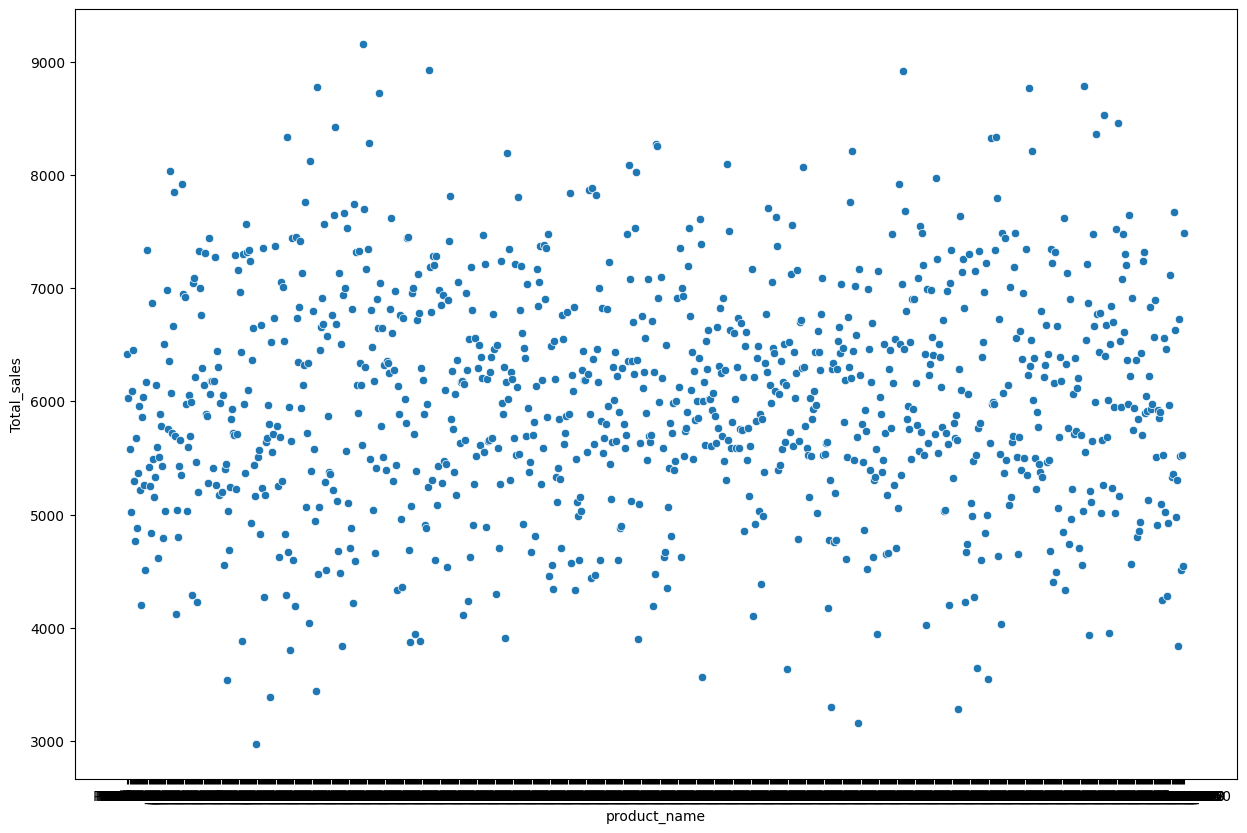

In [94]:
plt.figure(figsize=(15,10))

sns.scatterplot(
    x = "product_name",
    y = "Total_sales",
    data = prod_sales_df
)

### 2. How does revenue distribution look across different price ranges?
